In [1]:
# collect data
import numpy as np
import pandas as pd
import quandl
quandl.ApiConfig.api_key = "ocFbDopa9RsW7rNTVkx-"

In [2]:
import os
import edgar
dirpath = os.getcwd()
dirpath

'/Users/haozhewang/Desktop/Cornell Study/Fall 19/ORIE 4741/ORIE4741-Group-Project'

In [3]:
quandl.get("WIKI/BKNG", start_date="1998-7-10", end_date="2018-7-10", collapse="quarterly")

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-31,2137.43,2140.24,2056.51,2077.56,402327.0,0.0,1.0,2137.43,2140.24,2056.51,2077.56,402327.0


In [4]:
quandl.get("UKONS/J44A_A", authtoken="ocFbDopa9RsW7rNTVkx-")

,Value
Date,
1988-12-31,98.9
1989-12-31,103.0
1990-12-31,105.0
1991-12-31,99.2
1992-12-31,95.1
1993-12-31,94.4
1994-12-31,93.7
1995-12-31,89.4
1996-12-31,89.4


In [5]:
import matplotlib.pyplot as plt

In [12]:
tickers = pd.read_excel("Other data/sp500_ticker.xlsx", sheet_name=0, header=0, index_col=False, keep_default_na=True)
p = tickers["Symbol"]
sectors = tickers["GICS Sector"]
ll = []
for i in range(len(p)):
    if p[i] not in ["AMCR", "BF.B", "BRK.B", "CPRI", "GL", "LHX", "LIN", "LW", "EVRG", "CDW"]:
        ll.append((p[i], sectors[i]))
#ll = tuple(ll)
ll

[('ADP', 'Information Technology'),
 ('ADSK', 'Information Technology'),
 ('AIZ', 'Financials'),
 ('AJG', 'Financials'),
 ('AVB', 'Real Estate'),
 ('AVGO', 'Information Technology'),
 ('AVY', 'Materials'),
 ('AZO', 'Consumer Discretionary'),
 ('BAC', 'Financials'),
 ('BBT', 'Financials'),
 ('BBY', 'Consumer Discretionary'),
 ('BIIB', 'Health Care'),
 ('BK', 'Financials'),
 ('BKNG', 'Consumer Discretionary'),
 ('BLK', 'Financials'),
 ('BLL', 'Materials'),
 ('BSX', 'Health Care'),
 ('BWA', 'Consumer Discretionary'),
 ('BXP', 'Real Estate'),
 ('C', 'Financials'),
 ('CAG', 'Consumer Staples'),
 ('CAH', 'Health Care'),
 ('CB', 'Financials'),
 ('CBOE', 'Financials'),
 ('CBRE', 'Real Estate'),
 ('CCI', 'Real Estate'),
 ('CCL', 'Consumer Discretionary'),
 ('CDNS', 'Information Technology'),
 ('CE', 'Materials'),
 ('CELG', 'Health Care'),
 ('CERN', 'Health Care'),
 ('CF', 'Materials'),
 ('CFG', 'Financials'),
 ('CHD', 'Consumer Staples'),
 ('CHRW', 'Industrials'),
 ('CHTR', 'Communication Servi

In [10]:
error_occurred = 0
for i in range(tickers.shape[0]):
    firm_ticker = tickers["Symbol"][i]
    ticker = "WIKI/" + firm_ticker
    try:
        historical_price = quandl.get(ticker, start_date="2009-1-01", end_date="2018-12-31", collapse="quarterly")
        path = dirpath + "/" + "historical_data_quarterly/" + firm_ticker + ".csv"
        historical_price.to_csv(path)
    except Exception:
        error_occurred += 1
        print(ticker)
print(error_occurred)

WIKI/AMCR
WIKI/BF.B
WIKI/BRK.B
WIKI/CPRI
WIKI/GL
WIKI/LHX
WIKI/LIN
WIKI/LW
WIKI/EVRG
WIKI/CDW
10


In [11]:
error_occurred = 0
for i in range(tickers.shape[0]):
    firm_ticker = tickers["Symbol"][i]
    ticker = "WIKI/" + firm_ticker
    try:
        historical_price = quandl.get(ticker, start_date="2009-1-01", end_date="2018-12-31", collapse="monthly")
        path = dirpath + "/" + "historical_data_monthly/" + firm_ticker + ".csv"
        historical_price.to_csv(path)
    except Exception:
        error_occurred += 1
        print(ticker)
print(error_occurred)

WIKI/AMCR
WIKI/BF.B
WIKI/BRK.B
WIKI/CPRI
WIKI/GL
WIKI/LHX
WIKI/LIN
WIKI/LW
WIKI/EVRG
WIKI/CDW
10


In [12]:
m_date = "2018-12-31,2018-9-30,2018-6-30,2018-3-31,2017-12-31,2017-9-30,2017-6-30,2017-3-31,2016-12-31,2016-9-30,2016-6-30,2016-3-31,2015-12-31,2015-9-30,2015-6-30,2015-3-31,2014-12-31,2014-9-30,2014-6-30,2014-3-31,2013-12-31,2013-9-30,2013-6-30,2013-3-31,2012-12-31,2012-9-30,2012-6-30,2012-3-31,2011-12-31,2011-9-30,2011-6-30,2011-3-31,2010-12-31,2010-9-30,2010-6-30,2010-3-31,2009-12-31,2009-9-30,2009-6-30,2009-3-31"

In [16]:
len(ll)
quandl.get_table('SHARADAR/SF1', dimension = 'ARQ', ticker=ll[0][0])

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,
0,ADP,ARQ,2019-09-30,2019-11-04,2019-09-30,2019-11-04,-233900000,37714700000,None,29508500000,...,432698089,432700000,435400000,8.079,34332500000,0,156700000,831900000,79.345,307600000
1,ADP,ARQ,2019-06-30,2019-08-09,2019-06-30,2019-11-04,-257300000,41887700000,None,34342300000,...,433942837,433500000,436100000,8.071,38493200000,0,157900000,714700000,88.796,1714600000
2,ADP,ARQ,2019-03-31,2019-05-03,2019-03-31,2019-11-04,-411900000,48196300000,None,40924000000,...,435228237,434100000,436600000,8.863,44817300000,0,230800000,715500000,103.242,1758000000
3,ADP,ARQ,2018-12-31,2019-01-31,2018-12-31,2019-11-04,-615000000,38806300000,None,31682600000,...,435629656,435700000,438000000,8.047,35558200000,0,182800000,609900000,81.612,1385700000
4,ADP,ARQ,2018-09-30,2018-11-01,2018-09-30,2019-11-04,-740100000,37416700000,None,29955900000,...,437732499,436800000,439900000,7.608,34174500000,0,141400000,608600000,78.238,918600000
5,ADP,ARQ,2018-06-30,2018-08-03,2018-06-30,2019-11-04,-680800000,37088700000,None,32050000000,...,438082756,437900000,440900000,7.578,33958800000,0,95900000,151200000,77.549,1636400000
6,ADP,ARQ,2018-03-31,2018-05-04,2018-03-31,2019-11-04,-638800000,44065500000,None,38714000000,...,440522324,441000000,443400000,8.374,40926900000,0,209500000,185700000,92.805,1972800000
7,ADP,ARQ,2017-12-31,2018-02-01,2017-12-31,2019-11-04,-432600000,44545500000,None,39350000000,...,443269657,441300000,443700000,7.332,41548500000,0,98200000,171400000,94.150,2099100000
8,ADP,ARQ,2017-09-30,2017-11-02,2017-09-30,2019-11-04,-344600000,35661100000,None,31002600000,...,443489730,442200000,445000000,6.962,33216500000,0,146700000,283000000,75.116,2716000000


In [17]:
for i in range(len(ll)):
    print(i)
    core_data = quandl.get_table('SHARADAR/SF1', dimension = 'ARQ', ticker=ll[i][0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


KeyboardInterrupt: 

In [7]:
quandl.get_table('SHARADAR/SF1', dimension = 'ARQ', ticker=ll[0])

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,
0,ADP,ARQ,2019-09-30,2019-11-04,2019-09-30,2019-11-04,-233900000,37714700000,None,29508500000,...,432698089,432700000,435400000,8.079,34332500000,0,156700000,831900000,79.345,307600000
1,ADP,ARQ,2019-06-30,2019-08-09,2019-06-30,2019-11-04,-257300000,41887700000,None,34342300000,...,433942837,433500000,436100000,8.071,38493200000,0,157900000,714700000,88.796,1714600000
2,ADP,ARQ,2019-03-31,2019-05-03,2019-03-31,2019-11-04,-411900000,48196300000,None,40924000000,...,435228237,434100000,436600000,8.863,44817300000,0,230800000,715500000,103.242,1758000000
3,ADP,ARQ,2018-12-31,2019-01-31,2018-12-31,2019-11-04,-615000000,38806300000,None,31682600000,...,435629656,435700000,438000000,8.047,35558200000,0,182800000,609900000,81.612,1385700000
4,ADP,ARQ,2018-09-30,2018-11-01,2018-09-30,2019-11-04,-740100000,37416700000,None,29955900000,...,437732499,436800000,439900000,7.608,34174500000,0,141400000,608600000,78.238,918600000
5,ADP,ARQ,2018-06-30,2018-08-03,2018-06-30,2019-11-04,-680800000,37088700000,None,32050000000,...,438082756,437900000,440900000,7.578,33958800000,0,95900000,151200000,77.549,1636400000
6,ADP,ARQ,2018-03-31,2018-05-04,2018-03-31,2019-11-04,-638800000,44065500000,None,38714000000,...,440522324,441000000,443400000,8.374,40926900000,0,209500000,185700000,92.805,1972800000
7,ADP,ARQ,2017-12-31,2018-02-01,2017-12-31,2019-11-04,-432600000,44545500000,None,39350000000,...,443269657,441300000,443700000,7.332,41548500000,0,98200000,171400000,94.150,2099100000
8,ADP,ARQ,2017-09-30,2017-11-02,2017-09-30,2019-11-04,-344600000,35661100000,None,31002600000,...,443489730,442200000,445000000,6.962,33216500000,0,146700000,283000000,75.116,2716000000


In [18]:
concatenate_data = []
for i in range(len(ll)):
    ticker_name = ll[i][0]
    sector = ll[i][1]
    core_data = quandl.get_table('SHARADAR/SF1', dimension = 'ARQ', qopts={"columns":['ticker' ,'dimension','datekey', 'price', 
                                                                   'netinc','liabilities',
                                                  'equityusd', 'epsusd', 'revenueusd','netinccmnusd',
                                                  'debtusd', 'marketcap', 'equity','assets',
                                                  'fcf', 'gp', 'netmargin', 'pb', ]}, 
                 ticker=ticker_name)
    if core_data.shape[0] == 0:
        continue
    core_data["sector"] = sector
    core_data["NPGR"] = core_data["netinc"].diff() / core_data["netinc"]
    core_data["BTMkt"] = core_data["equityusd"] / core_data["marketcap"]
    core_data["equitymultiplier"] = core_data["assets"] / core_data["equity"]
    core_data["ROE"] = core_data["netinc"] / core_data["equityusd"]
    # +1 if the price of next period increase. -1 otherwise
    temp = -np.sign(core_data['price'].diff())
    # classify 0 as 1 (price no change)
    temp[temp == 0] = 1
    core_data["trend"] = temp
    concatenate_data.append(core_data)
path = dirpath + "/" + "core_data/" + "concatenate.csv"
df = pd.concat(concatenate_data)
df.to_csv(path)    

In [234]:
path = dirpath + "/" + "core_data/" + "concatenate.csv"
total_data = pd.read_csv(path)
total_data = total_data.iloc[:,1:total_data.shape[1]]
total_data = total_data.dropna()
total_data

,ticker,dimension,datekey,price,netinc,liabilities,equityusd,epsusd,revenueusd,netinccmnusd,...,fcf,gp,netmargin,pb,sector,NPGR,BTMkt,equitymultiplier,ROE,trend
1,ADP,ARQ,2019-08-09,167.73,4.754000e+08,36487800000,5399900000,1.10,3.498700e+09,4.754000e+08,...,6.160000e+08,1.478200e+09,0.136,13.479,Information Technology,-0.225074,0.074190,7.757125,0.088039,-1.0
2,ADP,ARQ,2019-05-03,160.19,7.537000e+08,42950100000,5246200000,1.74,3.847400e+09,7.537000e+08,...,7.936000e+08,1.735600e+09,0.196,13.289,Information Technology,0.369245,0.075248,9.186897,0.143666,1.0
3,ADP,ARQ,2019-01-31,139.84,5.582000e+08,34042400000,4763900000,1.28,3.505900e+09,5.582000e+08,...,6.879000e+08,1.492200e+09,0.159,12.788,Information Technology,-0.350233,0.078201,8.145910,0.117173,1.0
4,ADP,ARQ,2018-11-01,140.91,5.054000e+08,32737900000,4678800000,1.16,3.323200e+09,5.054000e+08,...,3.220000e+07,1.382700e+09,0.152,13.183,Information Technology,-0.104472,0.075855,7.997072,0.108019,-1.0
5,ADP,ARQ,2018-08-03,134.25,1.087000e+08,33629100000,3459600000,0.26,3.318600e+09,1.087000e+08,...,5.902000e+08,1.366300e+09,0.033,17.000,Information Technology,-3.649494,0.058824,10.720517,0.031420,1.0
6,ADP,ARQ,2018-05-04,125.36,6.431000e+08,40036300000,4029200000,1.46,3.693000e+09,6.431000e+08,...,1.030200e+09,1.615600e+09,0.174,13.706,Information Technology,0.830975,0.072961,10.936538,0.159610,1.0
7,ADP,ARQ,2018-02-01,120.42,4.675000e+08,40614300000,3931200000,1.06,3.235400e+09,4.675000e+08,...,3.227000e+08,1.288700e+09,0.144,13.578,Information Technology,-0.375615,0.073648,11.331273,0.118920,1.0
8,ADP,ARQ,2017-11-02,114.34,4.015000e+08,31707700000,3953400000,0.91,3.078800e+09,4.015000e+08,...,1.017000e+08,1.212400e+09,0.130,12.827,Information Technology,-0.164384,0.077963,9.020362,0.101558,1.0
9,ADP,ARQ,2017-08-04,111.39,2.658000e+08,33203000000,3977000000,0.60,3.064900e+09,2.658000e+08,...,3.232000e+08,1.217500e+09,0.087,12.446,Information Technology,-0.510534,0.080345,9.348755,0.066834,1.0
10,ADP,ARQ,2017-05-04,99.10,5.879000e+08,39752800000,4103100000,1.32,3.410800e+09,5.879000e+08,...,7.173000e+08,1.499800e+09,0.172,10.806,Information Technology,0.547882,0.092541,10.688479,0.143282,1.0


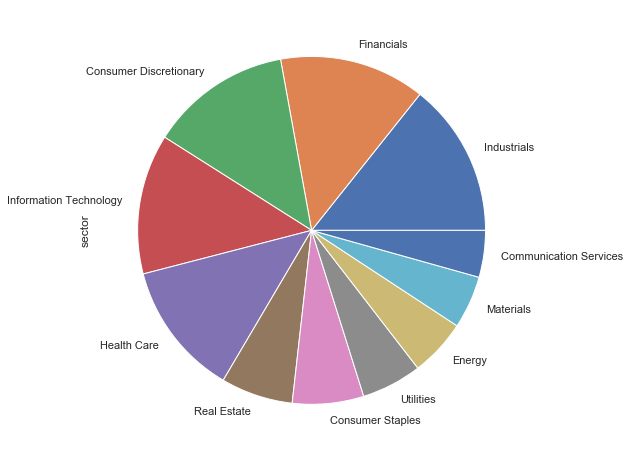

In [235]:
plt.figure(figsize=(16,8))
total_data.sector.value_counts().plot(kind='pie')
plt.show()

In [236]:
# one hot encoding for categorical variable 'sector'
# sector has 11 categories: Communication Services, Consumer Discretionary, Consumer Staples
# Energy, Financials, Health Care, Industrials, Information Technology
# Materials, Real Estate, Utilities
# clean format
temp = total_data['sector']
temp[temp == 'Communication Services'] = 'Communication_Services'
temp[temp == 'Consumer Discretionary'] = 'Consumer_Discretionary'
temp[temp == 'Consumer Staples'] = 'Consumer_Staples'
temp[temp == 'Health Care'] = 'Health_Care'
temp[temp == 'Information Technology'] = 'Information_Technology'
temp[temp == 'Real Estate'] = 'Real_Estate'
total_data['sector'] = temp
# one hot
# Get one hot encoding of columns B
one_hot = pd.get_dummies(total_data['sector'])
# Drop column B as it is now encoded
total_data = total_data.drop('sector',axis = 1)
# Join the encoded df
total_data = total_data.join(one_hot)

/Users/haozhewang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/haozhewang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/haozhewang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/haozhewang/anaconda3/

In [237]:
total_data

,ticker,dimension,datekey,price,netinc,liabilities,equityusd,epsusd,revenueusd,netinccmnusd,...,Consumer_Discretionary,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Utilities
1,ADP,ARQ,2019-08-09,167.73,4.754000e+08,36487800000,5399900000,1.10,3.498700e+09,4.754000e+08,...,0,0,0,0,0,0,1,0,0,0
2,ADP,ARQ,2019-05-03,160.19,7.537000e+08,42950100000,5246200000,1.74,3.847400e+09,7.537000e+08,...,0,0,0,0,0,0,1,0,0,0
3,ADP,ARQ,2019-01-31,139.84,5.582000e+08,34042400000,4763900000,1.28,3.505900e+09,5.582000e+08,...,0,0,0,0,0,0,1,0,0,0
4,ADP,ARQ,2018-11-01,140.91,5.054000e+08,32737900000,4678800000,1.16,3.323200e+09,5.054000e+08,...,0,0,0,0,0,0,1,0,0,0
5,ADP,ARQ,2018-08-03,134.25,1.087000e+08,33629100000,3459600000,0.26,3.318600e+09,1.087000e+08,...,0,0,0,0,0,0,1,0,0,0
6,ADP,ARQ,2018-05-04,125.36,6.431000e+08,40036300000,4029200000,1.46,3.693000e+09,6.431000e+08,...,0,0,0,0,0,0,1,0,0,0
7,ADP,ARQ,2018-02-01,120.42,4.675000e+08,40614300000,3931200000,1.06,3.235400e+09,4.675000e+08,...,0,0,0,0,0,0,1,0,0,0
8,ADP,ARQ,2017-11-02,114.34,4.015000e+08,31707700000,3953400000,0.91,3.078800e+09,4.015000e+08,...,0,0,0,0,0,0,1,0,0,0
9,ADP,ARQ,2017-08-04,111.39,2.658000e+08,33203000000,3977000000,0.60,3.064900e+09,2.658000e+08,...,0,0,0,0,0,0,1,0,0,0
10,ADP,ARQ,2017-05-04,99.10,5.879000e+08,39752800000,4103100000,1.32,3.410800e+09,5.879000e+08,...,0,0,0,0,0,0,1,0,0,0


In [238]:
total_data['sector'].shape

KeyError: 'sector'

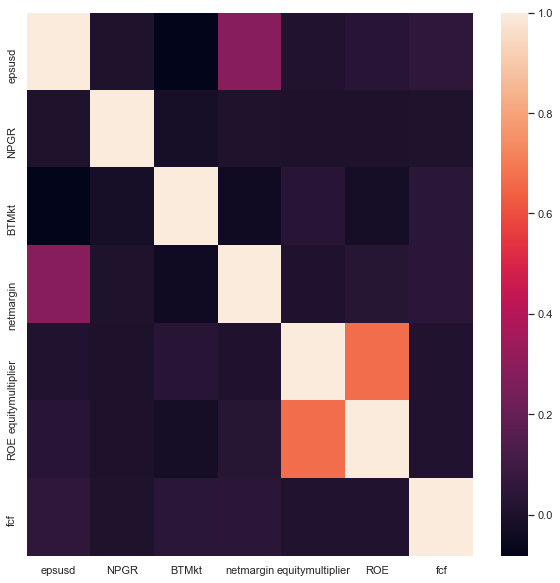

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# numerical correlation
numerical_data = total_data.iloc[:, 3:total_data.shape[1]]

check_corr = numerical_data[['epsusd', 'NPGR', 'BTMkt', 'netmargin', 'equitymultiplier','ROE', 'fcf']]
plt.figure(figsize=(10,10))
ax = sns.heatmap(check_corr.corr())

In [240]:
ret = []
tickers = np.unique(total_data['ticker'])
for i in range(len(tickers)):
    ticker_name = tickers[i]
    ticker_data = total_data[total_data.ticker == ticker_name]
    price = ticker_data['price']
    price = price.values
    ret.append((price[len(price)-1] - price[0]) / price[0])

/Users/haozhewang/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


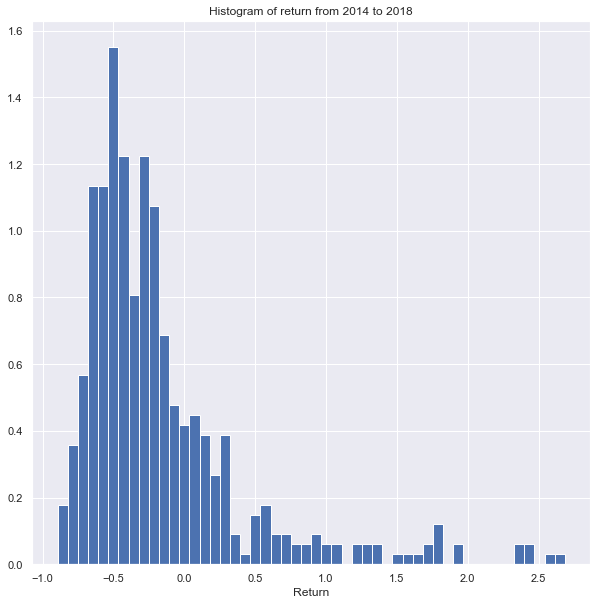

In [241]:
plt.figure(figsize=(10,10))
plt.hist(ret, bins=50, normed=True)
plt.xlabel('Return')
plt.title("Histogram of return from 2014 to 2018")
plt.show()

In [242]:
features = ['epsusd', 'NPGR', 'BTMkt', 'netmargin', 'equitymultiplier','ROE', 'fcf','Communication_Services',
                      'Consumer_Staples', 'Energy', 'Financials', 'Health_Care', 'Industrials', 'Information_Technology',
                      'Materials', 'Real_Estate', 'Utilities']
numerical_features = ['epsusd', 'NPGR', 'BTMkt', 'netmargin', 'equitymultiplier','ROE', 'fcf']

In [243]:
# train test split (80-20)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
total_data = total_data.replace([np.inf, -np.inf], np.nan)
total_data = total_data.dropna()
fit_data = total_data[['epsusd', 'NPGR', 'BTMkt', 'netmargin', 'equitymultiplier','ROE', 'fcf','Communication_Services',
                      'Consumer_Staples', 'Energy', 'Financials', 'Health_Care', 'Industrials', 'Information_Technology',
                      'Materials', 'Real_Estate', 'Utilities']]
X = fit_data
y = np.array(total_data['trend'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# normalize
for feature in numerical_features:
    mu = np.mean(X_train[feature])
    sigma = np.std(X_train[feature])
    X_train[feature] = (X_train[feature] - mu) / sigma
    X_test[feature] = (X_test[feature] - mu) / sigma

/Users/haozhewang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/haozhewang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [244]:
print(sum(y_train == 1))
print(sum(y_train == -1))
print(sum(y_train == 0))

4949
3219
0


In [245]:
print(sum(y_test == 1))
print(sum(y_test == -1))
print(sum(y_test == 0))

1217
825
0


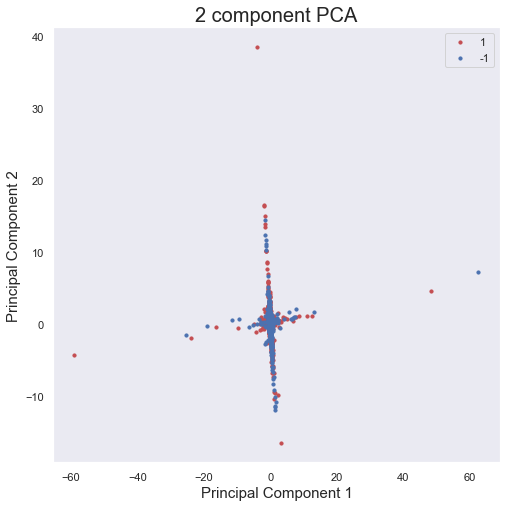

In [246]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['target'] = y_train
finalDf = principalDf

# plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [+1, -1,]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

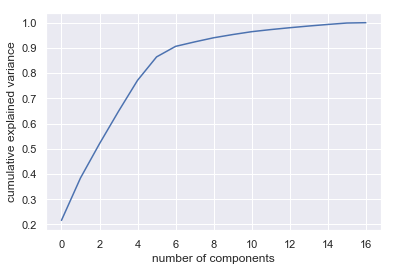

In [247]:
pca_fits = PCA().fit(X_train)
plt.plot(np.cumsum(pca_fits.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [248]:
# fit svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
linsvm_clf = LinearSVC(penalty = 'l2', random_state=0, loss = 'hinge', max_iter = 5000)
linsvm_clf.fit(X_train, y_train)
# train accuracy
linsvm_clf.score(X_train, y_train)

/Users/haozhewang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.609818805093046

In [249]:
y_pred = linsvm_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  73,  752],
       [  55, 1162]])

In [250]:
# test accuracy
linsvm_clf.score(X_test, y_test)

0.6047992164544564

In [251]:
# fit SVM
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)
# train accuracy
svm_clf.score(X_train, y_train)

0.6148383937316356

In [252]:
y_pred = svm_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  72,  753],
       [  58, 1159]])

In [253]:
# test accuracy
svm_clf.score(X_test, y_test)

0.6028403525954946

In [254]:
# fit random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=2000, max_depth=2, class_weight="balanced_subsample")
rf_clf.fit(X_train, y_train)
# train accuracy
rf_clf.score(X_train, y_train)

0.5726003917727718

In [255]:
y_pred = rf_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[367, 458],
       [456, 761]])

In [256]:
# test accuracy
rf_clf.score(X_test, y_test)

0.5523996082272282

In [257]:
print(rf_clf.feature_importances_)

[0.06151229 0.19743808 0.14936971 0.10599158 0.07714757 0.05989331
 0.04531719 0.00452325 0.00125266 0.18385505 0.00135557 0.01092357
 0.00128819 0.03380889 0.01707718 0.00184427 0.04740164]


In [258]:
# fit logistic regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(penalty='l1', random_state=0, solver='saga', max_iter=2000)
log_clf.fit(X_train, y_train)
# train accuracy
log_clf.score(X_train, y_train)

0.6096963761018609

In [259]:
y_pred = log_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  73,  752],
       [  57, 1160]])

In [260]:
# test accuracy
log_clf.score(X_test, y_test)

0.6038197845249755

In [261]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(log_clf.coef_))], axis = 1)
coefficients

,0,0
0,epsusd,0.023637
1,NPGR,0.021594
2,BTMkt,-0.058431
3,netmargin,-0.000125
4,equitymultiplier,0.022911
5,ROE,-0.010383
6,fcf,-0.002005
7,Communication_Services,-0.076598
8,Consumer_Staples,0.032569
9,Energy,-0.406591


In [262]:
# multilayer neural network
from sklearn.neural_network import MLPClassifier
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
nn_clf.fit(X_train, y_train)
# train accuracy
nn_clf.score(X_train, y_train)

0.6183888344760039

In [263]:
y_pred = nn_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  89,  736],
       [  75, 1142]])

In [264]:
# test accuracy
nn_clf.score(X_test, y_test)

0.6028403525954946

In [265]:
# boost
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(n_estimators=5000, random_state=0)
adaboost_clf.fit(X_train, y_train)
# train accuracy
adaboost_clf.score(X_train, y_train)

0.7155974534769833

In [266]:
y_pred = adaboost_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[201, 624],
       [253, 964]])

In [267]:
# test accuracy
adaboost_clf.score(X_test, y_test)

0.5705190989226249

In [268]:
adaboost_clf.feature_importances_

array([0.1022, 0.1542, 0.1652, 0.129 , 0.1328, 0.137 , 0.1754, 0.0004,
       0.    , 0.0006, 0.0006, 0.0008, 0.0004, 0.0004, 0.0004, 0.0004,
       0.0002])

In [269]:
# xgboost
# https://xgboost.readthedocs.io/en/latest//parameter.html
from xgboost import XGBClassifier
XGB_clf = XGBClassifier(n_estimators=500, max_depth=6, gamma = 0.1)
XGB_clf.fit(X_train, y_train)
# train accuracy
XGB_clf.score(X_train, y_train)

0.941234084231146

In [270]:
confusion_matrix(y_train, XGB_clf.predict(X_train))

array([[2763,  456],
       [  24, 4925]])

In [271]:
y_pred = XGB_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[223, 602],
       [255, 962]])

In [272]:
# test accuracy
XGB_clf.score(X_test, y_test)

0.5803134182174339

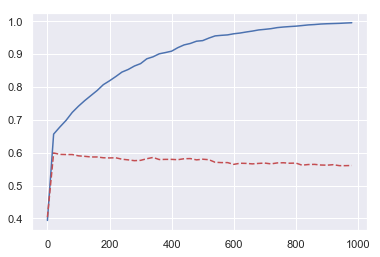

In [273]:
i = 0
num_est = 0
train_accu = []
test_accu = []
idx = []
while num_est < 1000:
    idx.append(num_est)
    XGB_clf = XGBClassifier(n_estimators=num_est, max_depth=6, gamma = 0.1)
    XGB_clf.fit(X_train, y_train)
    # train accuracy
    train_accu.append(XGB_clf.score(X_train, y_train))
    test_accu.append(XGB_clf.score(X_test, y_test))
    num_est += 20
plt.plot(idx, train_accu, 'b-')
plt.plot(idx, test_accu, 'r--')

In [203]:
XGB_clf = XGBClassifier(n_estimators=500, max_depth=6, gamma = 0.1)
XGB_clf.fit(X_train, y_train)
# train accuracy
XGB_clf.score(X_train, y_train)

0.941234084231146

In [204]:
y_pred = XGB_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[223, 602],
       [255, 962]])

In [205]:
# test accuracy
XGB_clf.score(X_test, y_test)

0.5803134182174339

In [352]:
import glob
path = "historical_data_monthly/*.csv"
csv_list = []
for fname in glob.glob(path):
    names = fname.split('/')
    csv_list.append(names[1])

In [353]:
csv_list[0]

'CSCO.csv'

In [245]:
# folder = "historical_data_monthly"
# path = folder + '/' + csv_list[0]
# example = pd.read_csv(path)
# example[['Date', 'Close']]

,Date,Close
0,2009-01-31,14.970
1,2009-02-28,14.570
2,2009-03-31,16.770
3,2009-04-30,19.320
4,2009-05-31,18.500
5,2009-06-30,18.650
6,2009-07-31,22.010
7,2009-08-31,21.600
8,2009-09-30,23.540
9,2009-10-31,22.810


In [248]:
# total_data[total_data['ticker'] == 'CSCO']

,ticker,dimension,datekey,price,netinc,liabilities,equityusd,epsusd,revenueusd,netinccmnusd,...,assets,fcf,gp,netmargin,pb,NPGR,BTMkt,equitymultiplier,ROE,trend
1169,CSCO,ARQ,2019-05-21,56.52,3.044000e+09,60483000000,36804000000,0.70,1.295800e+10,3.044000e+09,...,97287000000,4.106000e+09,8.173000e+09,0.235,6.574,0.275296,0.152116,2.643381,0.082708,-1.0
1170,CSCO,ARQ,2019-02-19,49.65,2.822000e+09,61673000000,40789000000,0.63,1.244600e+10,2.822000e+09,...,102462000000,3.544000e+09,7.773000e+09,0.227,5.358,-0.078668,0.186626,2.512001,0.069185,1.0
1171,CSCO,ARQ,2018-11-20,44.49,3.549000e+09,61581000000,43848000000,0.78,1.307200e+10,3.549000e+09,...,105429000000,3.553000e+09,8.146000e+09,0.271,4.562,0.204846,0.219212,2.404420,0.080939,1.0
1172,CSCO,ARQ,2018-09-06,47.28,3.803000e+09,65580000000,43204000000,0.78,1.284400e+10,3.803000e+09,...,108784000000,3.891000e+09,7.922000e+09,0.296,5.003,0.066789,0.199896,2.517915,0.088024,-1.0
1173,CSCO,ARQ,2018-05-22,43.65,2.691000e+09,67347000000,46661000000,0.56,1.246300e+10,2.691000e+09,...,114008000000,2.178000e+09,7.759000e+09,0.216,4.399,-0.413229,0.227303,2.443325,0.057671,1.0
1174,CSCO,ARQ,2018-02-20,44.06,-8.778000e+09,79528000000,51982000000,-1.78,1.188700e+10,-8.778000e+09,...,131510000000,3.909000e+09,7.498000e+09,-0.738,4.083,1.306562,0.244898,2.529914,-0.168866,-1.0
1175,CSCO,ARQ,2017-11-21,36.65,2.394000e+09,64972000000,65550000000,0.48,1.213600e+10,2.394000e+09,...,130522000000,2.913000e+09,7.427000e+09,0.197,2.764,4.666667,0.361787,1.991182,0.036522,1.0
1176,CSCO,ARQ,2017-09-07,31.76,2.424000e+09,63681000000,66137000000,0.49,1.213300e+10,2.424000e+09,...,129818000000,3.794000e+09,7.546000e+09,0.200,2.378,0.012376,0.420521,1.962865,0.036651,1.0
1177,CSCO,ARQ,2017-05-23,31.76,2.515000e+09,60568000000,65382000000,0.50,1.194000e+10,2.515000e+09,...,125950000000,3.144000e+09,7.518000e+09,0.211,2.429,0.036183,0.411721,1.926371,0.038466,-0.0
1178,CSCO,ARQ,2017-02-21,34.13,2.348000e+09,62430000000,63811000000,0.47,1.158000e+10,2.348000e+09,...,126248000000,3.524000e+09,7.276000e+09,0.203,2.679,-0.071124,0.373342,1.978468,0.036796,-1.0


In [254]:
# core_data = quandl.get_table('SHARADAR/SF1', dimension = 'ARQ', qopts={"columns":['ticker' ,'dimension','datekey', 'price', 
#                                                                    'netinc','liabilities',
#                                                   'equityusd', 'epsusd', 'revenueusd','netinccmnusd',
#                                                   'debtusd', 'marketcap', 'equity','assets',
#                                                   'fcf', 'gp', 'netmargin', 'pb', ]}, 
#                  ticker=ll[0])
# core_data

,ticker,dimension,datekey,price,netinc,liabilities,equityusd,epsusd,revenueusd,netinccmnusd,debtusd,marketcap,equity,assets,fcf,gp,netmargin,pb
None,,,,,,,,,,,,,,,,,,
0,ADP,ARQ,2019-11-04,161.88,582400000,32354000000,5360700000,1.35,3495700000,582400000,6325400000,70045166647,5360700000,37714700000,311200000,1450900000,0.167,13.066
1,ADP,ARQ,2019-08-09,167.73,475400000,36487800000,5399900000,1.10,3498700000,475400000,2264200000,72785232050,5399900000,41887700000,616000000,1478200000,0.136,13.479
2,ADP,ARQ,2019-05-03,160.19,753700000,42950100000,5246200000,1.74,3847400000,753700000,2002300000,69719211285,5246200000,48196300000,793600000,1735600000,0.196,13.289
3,ADP,ARQ,2019-01-31,139.84,558200000,34042400000,4763900000,1.28,3505900000,558200000,3208300000,60918451095,4763900000,38806300000,687900000,1492200000,0.159,12.788
4,ADP,ARQ,2018-11-01,140.91,505400000,32737900000,4678800000,1.16,3323200000,505400000,2455400000,61680886434,4678800000,37416700000,32200000,1382700000,0.152,13.183
5,ADP,ARQ,2018-08-03,134.25,108700000,33629100000,3459600000,0.26,3318600000,108700000,2002400000,58812609993,3459600000,37088700000,590200000,1366300000,0.033,17.000
6,ADP,ARQ,2018-05-04,125.36,643100000,40036300000,4029200000,1.46,3693000000,643100000,2002400000,55223878537,4029200000,44065500000,1030200000,1615600000,0.174,13.706
7,ADP,ARQ,2018-02-01,120.42,467500000,40614300000,3931200000,1.06,3235400000,467500000,2002400000,53378532096,3931200000,44545500000,322700000,1288700000,0.144,13.578
8,ADP,ARQ,2017-11-02,114.34,401500000,31707700000,3953400000,0.91,3078800000,401500000,2131500000,50708615728,3953400000,35661100000,101700000,1212400000,0.130,12.827
